> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [158]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import sqlite3
import numpy as np
%matplotlib inline
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [159]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# player_At =pd.read_sql_query('select * from player_Attributes', cnt)
# country =pd.read_sql_query('select * from country', cnt)
# player =pd.read_sql_query('select * from player', cnt)
# league =pd.read_sql_query('select * from league', cnt)

# team =pd.read_sql_query('select * from team', cnt)
# team_At =pd.read_sql_query('select * from team_Attributes', cnt)

#print(country.columns)

cnt = sqlite3.connect('database.sqlite')
# match =pd.read_sql_query('select * from match', cnt)
game_query = """
SELECT cy.name, lg.name , lg.id, mt.season, mt.stage, mt.date, mt.match_api_id, mt.home_team_api_id, 
mt.away_team_api_id,mt.home_team_goal
FROM country cy
 JOIN league lg ON cy.id =lg.id
 JOIN match mt ON mt.id = lg.id """
 
team_query = """SELECT tm.team_api_id, tm.team_fifa_api_id, tm.team_long_name,
tm.team_short_name, tm_at.buildUpPlaySpeed, tm_at.buildUpPlaySpeedClass, tm_at.buildUpPlayDribbling, 
tm_at.buildUpPlayDribblingClass, tm_at.buildUpPlayPassing, tm_at.buildUpPlayPassingClass 
FROM team tm 
JOIN team_Attributes tm_at ON tm.id = tm_at.id"""

player_query = """
SELECT py.player_api_id, py.player_name, py.player_fifa_api_id, py.birthday, 
py.height, py.weight, py_at.date, py_at.overall_rating,py_at.potential, py_at.preferred_foot, py_at.attacking_work_rate,
py_at.defensive_work_rate, py_at.crossing, py_at.finishing, py_at.heading_accuracy, py_at.short_passing, py_at.volleys,
py_at.dribbling, py_at.curve ,py_at.free_kick_accuracy, py_at.long_passing, py_at.ball_control, py_at.acceleration, 
py_at.sprint_speed, py_at.agility,py_at.reactions, py_at.balance, py_at.shot_power, py_at.jumping, py_at.stamina, 
py_at.strength, py_at.long_shots, py_at.aggression, py_at.interceptions, py_at.positioning, py_at.vision, py_at.penalties,
py_at.marking, py_at.standing_tackle, py_at.sliding_tackle
FROM player py
JOIN player_Attributes py_at ON py.id = py_at.id
"""
game = pd.read_sql_query(game_query, cnt)
team =pd.read_sql_query(team_query, cnt)
play =pd.read_sql_query(player_query, cnt)
#print('player: ', play.shape)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.
cy country tm team tm_t team_attributes
mt match 
lg league
py player
py_at player attributes
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

>exploring the game dataset which contains the country, league and match tables

In [160]:
game.shape

(11, 10)

In [161]:
game.head(5)

,name,name,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1
1,England,England Premier League,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1
2,France,France Ligue 1,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,2
3,Germany,Germany 1. Bundesliga,7809,2008/2009,1,2008-08-15 00:00:00,499317,9823,9790,2
4,Italy,Italy Serie A,10257,2008/2009,1,2008-08-31 00:00:00,537632,8524,8551,1


In [162]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              11 non-null     object
 1   name              11 non-null     object
 2   id                11 non-null     int64 
 3   season            11 non-null     object
 4   stage             11 non-null     int64 
 5   date              11 non-null     object
 6   match_api_id      11 non-null     int64 
 7   home_team_api_id  11 non-null     int64 
 8   away_team_api_id  11 non-null     int64 
 9   home_team_goal    11 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1008.0+ bytes


> date needs to be changed to datetime

>exploring team data which contains team and team attributes

In [163]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       7 non-null      float64
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.8+ KB


In [183]:
mean = team['buildUpPlayDribbling'].mean
team['buildUpPlayDribbling'].fillna(mean, inplace = True)


In [184]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       21 non-null     object 
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ KB


In [187]:
team.head()

RecursionError: maximum recursion depth exceeded in __instancecheck__

RecursionError: maximum recursion depth exceeded in __instancecheck__

>exploring player data which contains player and player attributes tables

In [169]:
play.shape

(11060, 40)

In [170]:
play.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11055    False
11056    False
11057    False
11058    False
11059    False
Length: 11060, dtype: bool

In [171]:
play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        11060 non-null  int64  
 1   player_name          11060 non-null  object 
 2   player_fifa_api_id   11060 non-null  int64  
 3   birthday             11060 non-null  object 
 4   height               11060 non-null  float64
 5   weight               11060 non-null  int64  
 6   date                 11060 non-null  object 
 7   overall_rating       11021 non-null  float64
 8   potential            11021 non-null  float64
 9   preferred_foot       11021 non-null  object 
 10  attacking_work_rate  10897 non-null  object 
 11  defensive_work_rate  11021 non-null  object 
 12  crossing             11021 non-null  float64
 13  finishing            11021 non-null  float64
 14  heading_accuracy     11021 non-null  float64
 15  short_passing        11021 non-null 

In [172]:
pl_mean = play['overall_rating'].mean()
play['overall_rating'].fillna(pl_mean, inplace= True)
pt_mean = play['potential'].mean()
play['potential'].fillna(pt_mean, inplace= True)

In [173]:
play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        11060 non-null  int64  
 1   player_name          11060 non-null  object 
 2   player_fifa_api_id   11060 non-null  int64  
 3   birthday             11060 non-null  object 
 4   height               11060 non-null  float64
 5   weight               11060 non-null  int64  
 6   date                 11060 non-null  object 
 7   overall_rating       11060 non-null  float64
 8   potential            11060 non-null  float64
 9   preferred_foot       11021 non-null  object 
 10  attacking_work_rate  10897 non-null  object 
 11  defensive_work_rate  11021 non-null  object 
 12  crossing             11021 non-null  float64
 13  finishing            11021 non-null  float64
 14  heading_accuracy     11021 non-null  float64
 15  short_passing        11021 non-null 

In [174]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second


In [175]:
mean_cr = play['crossing'].mean
play['crossing'].fillna(mean_cr, inplace = True)
mean_pw = play['shot_power'].mean
#play['shot_power'].fillna(mean_pw, inplace = True)
mean_ps = play['long_passing'].mean
play['long_passing'].fillna(mean_ps, inplace = True)
mean_fn = play['finishing'].mean
play['finishing'].fillna(mean_fn, inplace = True)
mean_sp = play['sprint_speed'].mean
play['sprint_speed'].fillna(mean_sp, inplace = True)
mean_ac = play['acceleration'].mean
play['acceleration'].fillna(mean_ac, inplace = True)



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (The relationship between physical attributes and player perfomance)

In [176]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [177]:
#play['birthday'].value_counts().plot(kind ='bar', figsize=(10,7))

<AxesSubplot:xlabel='weight', ylabel='shot_power'>

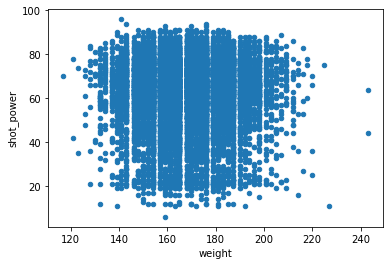

In [178]:
play.plot(x ='weight', y ='shot_power', kind ='scatter')

TypeError: float() argument must be a string or a number, not 'method'

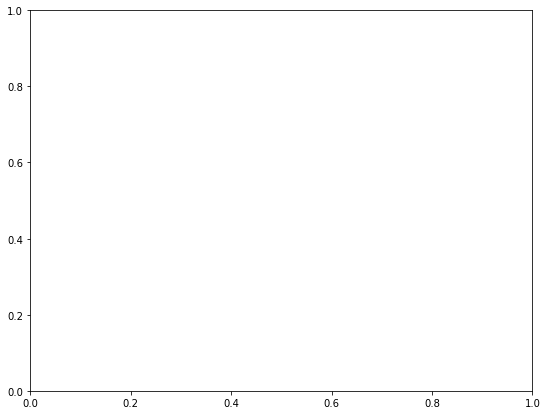

In [179]:
play.plot(x='height', y= 'long_passing', kind = 'scatter', figsize= (9,7))

### Research Question 2  (Replace this header name!)

In [180]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


TypeError: float() argument must be a string or a number, not 'method'

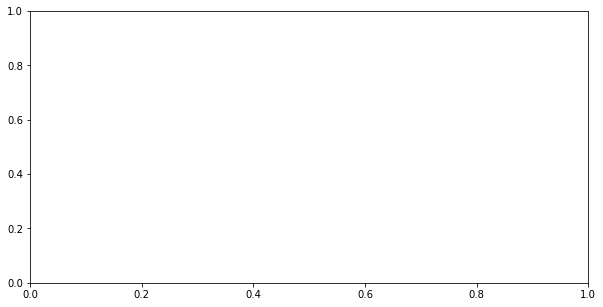

In [181]:
play.plot(x='crossing', y= 'finishing', kind = 'scatter', figsize= (10,5))

TypeError: float() argument must be a string or a number, not 'method'

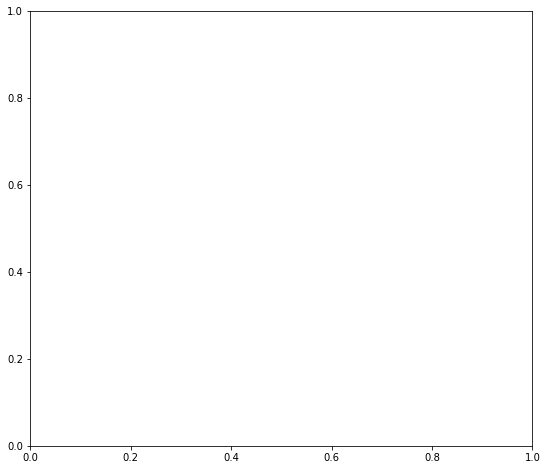

In [182]:
play.plot(x='sprint_speed', y= 'acceleration', kind = 'scatter', figsize= (9,8))

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!